In [1]:
#Code for Preprocessing race dataset
from datasets import load_dataset
import json
import re

# Load the dataset
dataset = load_dataset("race", "all")

# Text cleaning function
def clean_text(text):
    text = re.sub(r"\s+", " ", text)  # Remove excessive whitespace
    return text.strip()  # Remove leading/trailing spaces

# Preprocess dataset
preprocessed_data = []

for split in ["train", "validation", "test"]:
    for item in dataset[split]:
        # Extract relevant fields
        passage = clean_text(item.get("article", ""))
        question = clean_text(item.get("question", ""))
        options = [clean_text(opt) for opt in item.get("options", [])]
        answer = clean_text(item.get("answer", ""))

        # Ensure data integrity
        if not passage or not question or len(options) == 0 or not answer:
            print(f"Skipping incomplete example: {item}")
            continue

        # Append to preprocessed data (without example_id)
        preprocessed_data.append({
            "passage": passage,
            "question": question,
            "options": options,
            "answer": answer
        })

# Save to JSON file
with open("preprocessed_race.json", "w") as f:
    json.dump(preprocessed_data, f, indent=4)

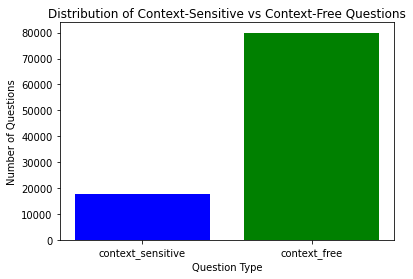

In [2]:
#Code for visualizing the data of context-free questions
import matplotlib.pyplot as plt

# Define a list of context-sensitive phrases
#This is not exhaustive and should be expanded
context_sensitive_phrases = [
    "which of the following", "best", "not true", "except", "most likely",
    "all of these", "most appropriate", "main idea", "central theme", 
    "least likely", "author's purpose", "does NOT match", "main point", 
    "strongest evidence", "weakest argument", "most accurate", 
    "as stated in the text", "what prediction", "what would happen", 
    "which option fits"
]

# Function to check if a question is context-sensitive
def is_context_sensitive(question):
    return any(phrase in question.lower() for phrase in context_sensitive_phrases)

# Count context-sensitive and context-free questions
counts = {"context_sensitive": 0, "context_free": 0}

for item in preprocessed_data:
    question = item["question"]
    if is_context_sensitive(question):
        counts["context_sensitive"] += 1
    else:
        counts["context_free"] += 1

# Plot the counts
plt.bar(counts.keys(), counts.values(), color=['blue', 'green'])
plt.title("Distribution of Context-Sensitive vs Context-Free Questions")
plt.ylabel("Number of Questions")
plt.xlabel("Question Type")
plt.show()




In [9]:
#Code for randomly generating 50 questions
import random

#Change seed to generate 
random.seed(1234)

# Filter context-free questions
context_free_questions = [
    item["question"] for item in preprocessed_data 
    if not is_context_sensitive(item["question"])
]

# Ensure we don't exceed the number of available questions
num_questions_to_print = min(50, len(context_free_questions))

# Randomly sample 50 questions (or fewer if less available)
random_questions = random.sample(context_free_questions, num_questions_to_print)

# Print the selected questions
print(f"Randomly selected {num_questions_to_print} context-free questions:\n")
for idx, question in enumerate(random_questions, start=1):
    print(f"{idx}. {question}")


Randomly selected 50 context-free questions:

1. The Englishman was angry by the end of the day, but he _ .
2. Why did the author agree to let the man spend the night in his house at last?
3. It appears that the writer tends to think highly of the person who sleeps on one side because _ .
4. What's the author's initial attitude towards volunteering?
5. When the author turned fifty, people around him _ .
6. The United States is a typical country _ .
7. What causes people to feel uncomfortable when entering the an elevator?
8. What is the text mainly about?
9. To shoot a film, a shooting schedule must be fixed first _ .
10. During sleeping time, the job of watching over the shuttle is done by
11. How many types of word games are mentioned in the passage?
12. How did the writer like the shop?
13. "Shakespeare's people" in Para.4 refers to _ .
14. The text mainly tells us _ .
15. There are some _ on the table.
16. According to the passage, culture shock usually happens when you
17. What do